In [4]:
import numpy as np
import pyvista
import pymeshfix

In [5]:
import openep
from openep._datasets.meshes import MESH_2


In [7]:
endo = pyvista.read(MESH_2)

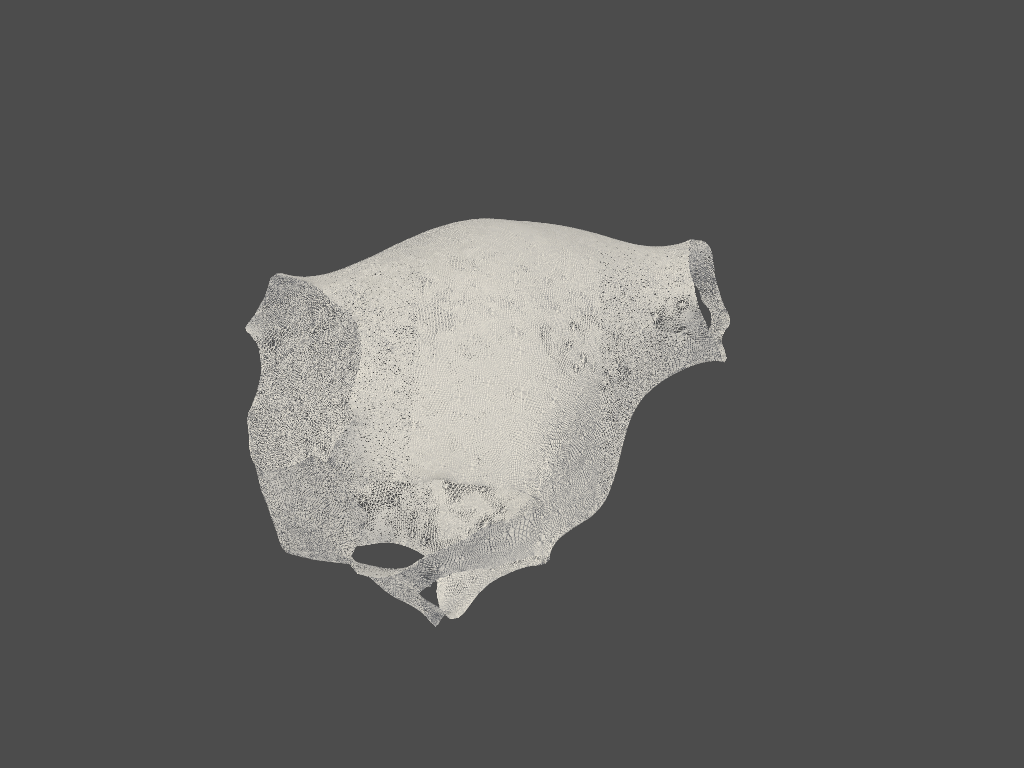

In [14]:
plotter = pyvista.Plotter()
plotter.add_mesh(endo)
plotter.add_mesh(endo, style='wireframe')
plotter.show()


In [15]:
endo_mf = pymeshfix.MeshFix(endo)
endo_mf.repair(joincomp=False, remove_smallest_components=True)
endo = endo_mf.mesh


In [16]:
endo.point_data['Thickness'] = np.full(endo.n_points, fill_value=5, dtype=float)
endo.point_data['Colour'] = np.full(endo.n_points, fill_value=0, dtype=float)
endo.compute_normals(inplace=True)


PolyData (0x7f8ba00b9ac0)
  N Cells:	476022
  N Points:	238013
  X Bounds:	-5.352e+01, 5.339e+01
  Y Bounds:	-2.865e+01, 4.162e+01
  Z Bounds:	-3.245e+01, 3.041e+01
  N Arrays:	4

In [17]:
epi = endo.copy(deep=True)
epi.points += epi.point_data['Normals'] * epi.point_data['Thickness'][:, np.newaxis]
epi.point_data['Colour'][:] = 1


In [18]:
resolution = 1.0 # in mm

In [19]:
epi_refined = epi.subdivide_adaptive(
    max_edge_len=resolution/2,
    inplace=False,
    progress_bar=True,
)


Adaptively Subdividing Mesh: 100%|███████████████████████████████████████████████████████████████████████████████████████████[00:01<00:00]


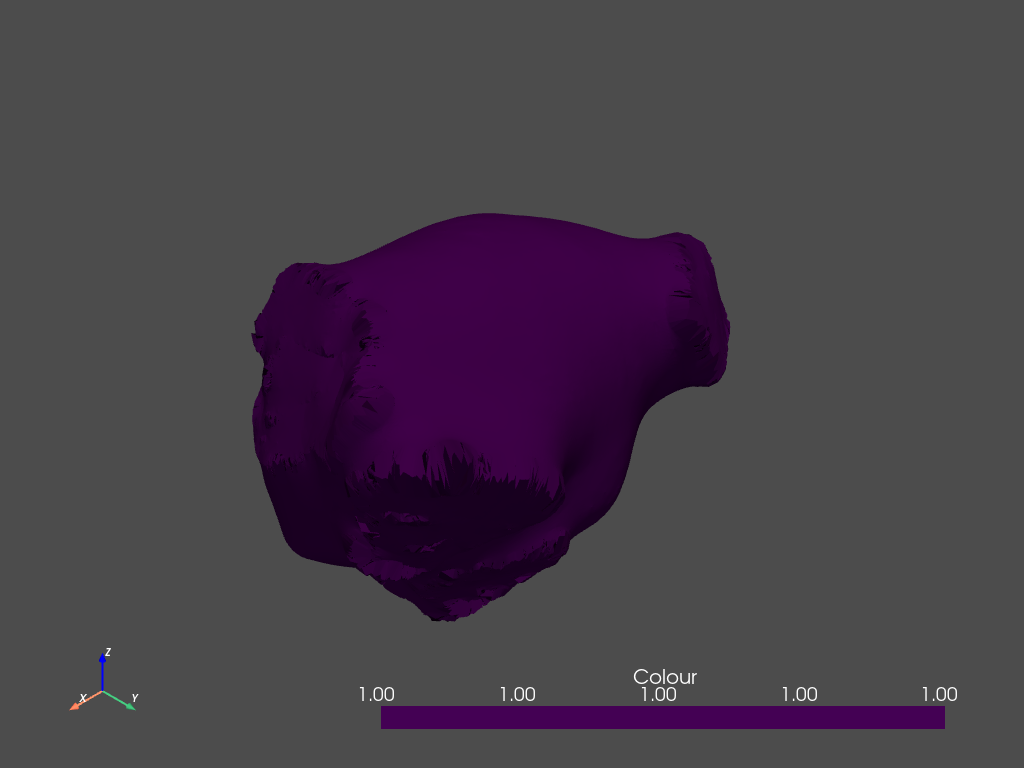

In [20]:
epi_refined.plot()

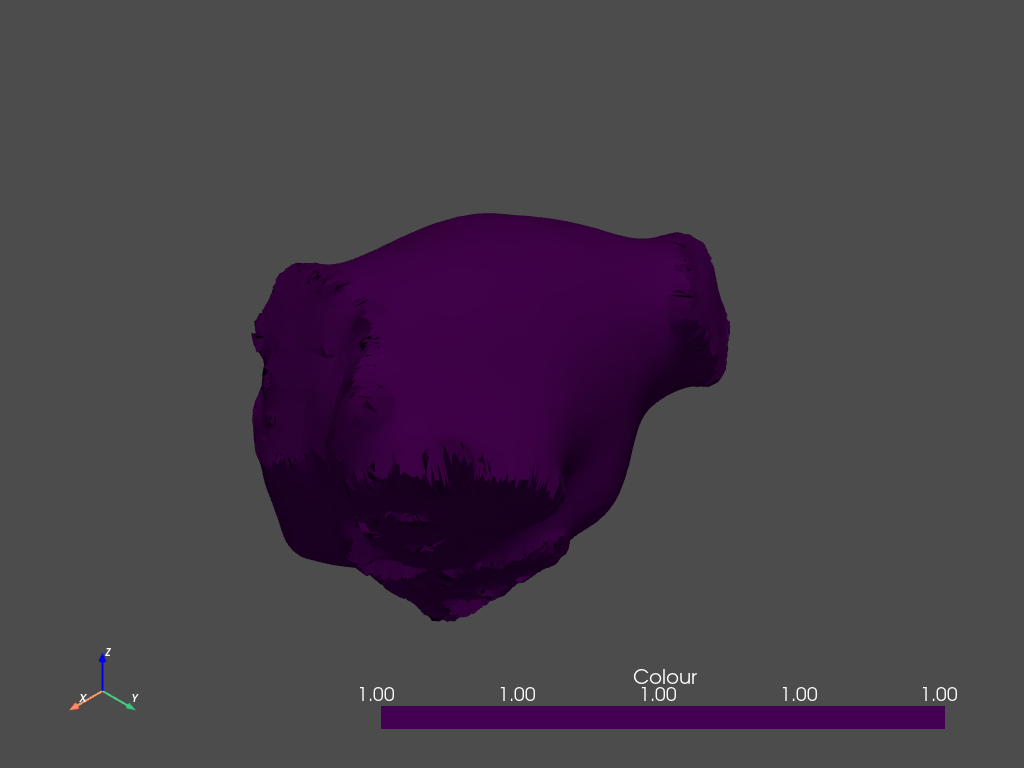

In [21]:
epi.plot()